**Realizado por Carlos Ramírez Fernández, Javier Granados Baltuille y Miguel Pérez de la Cruz López (M12)**

<H1><p style="text-align:center">Péndulo Simple </p></H1>

<img src = "https://fqdomingomiral.com/fqdmiral/FQ1BAC/FQ1BAC%20Tema%205%20Dinamica/pendulo2.jpg" width="300"
height="200" alt="ejemplo"  align="center"/>

Fuente: https://fqdomingomiral.com/fqdmiral/FQ1BAC/FQ1BAC%20Tema%205%20Dinamica/pendulo2.jpg

#  1.<span style='color:#f11b13'>|</span> Introducción

Un péndulo simple es un sistema formado por una cuerda de masa despreciable unida a un objeto en uno de sus extremos, en este caso una pequeña esfera, que oscilará con un determinado período.

# 2.<span style='color:#f7bc6d'>|</span> Importación de las librerías para el manejo y análisis de datos

In [17]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [18]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
from chart_studio import plotly
# from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # este código, nos permite trabajar con la versión plotly offline
# Usamos plotly + cufflinks en modo offline 
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

# 3.<span style='color:#2615BB'>|</span> Lectura del csv con nuestros datos experimentales

In [26]:
# Read Excel file
pendulo = pd.read_csv('Péndulo.csv')
print("Shape of dataframe is: {}".format(pendulo.shape))

Shape of dataframe is: (5, 24)


·La dimensión del dataframe es de 5 filas y 24 columnas

# 4.<span style='color:#D4134D'>|</span>Imprimimos los datos

In [9]:
pendulo.head()

,Longitud (m),Error de longitud (m),Tiempo 1 (s),Error de tiempo 1 (s),Tiempo 2 (s),Error de tiempo 2 (s),Tiempo 3 (s),Error de tiempo 3 (s),Tiempo medio (s),Error de tiempo medio (s),Tiempo medio al cuadrado (s^2),Error de tiempo medio al cuadrado (s^2),Ángulo (rad),Error de ángulo (rad),Seno al cuadrado de mitad el ángulo (rad^2),Error de seno al cuadrado de mitad el ángulo (rad^2),Tiempo 1 (s).1,Error de tiempo 1 (s).1,Tiempo 2 (s).1,Error de tiempo 2 (s).1,Tiempo 3 (s).1,Error de tiempo 3 (s).1,Tiempo medio (s).1,Error de tiempo medio (s).1
0,0.15,0.001,0.65664,0.00002,0.66622,0.00002,0.63844,0.00002,0.65377,0.00002,0.42741,0.000026,0.35,0.02,0.030,0.003,1.33992,0.00002,1.34232,0.00002,1.33980,0.00002,1.34068,0.00002
1,0.20,0.001,0.89970,0.00002,0.90036,0.00002,0.89972,0.00002,0.89993,0.00002,0.80987,0.000036,0.52,0.02,0.067,0.004,1.35924,0.00002,1.36100,0.00002,1.36338,0.00002,1.36121,0.00002
2,0.30,0.001,0.94070,0.00002,0.94356,0.00002,0.95006,0.00002,0.94477,0.00002,0.89260,0.000038,0.70,0.02,0.117,0.006,1.37808,0.00002,1.37892,0.00002,1.38036,0.00002,1.37912,0.00002
3,0.35,0.001,1.15288,0.00002,1.15448,0.00002,1.15874,0.00002,1.15537,0.00002,1.33487,0.000046,0.87,0.02,0.179,0.007,1.41236,0.00002,1.41182,0.00002,1.41192,0.00002,1.41203,0.00002
4,0.45,0.001,1.37742,0.00002,1.38826,0.00002,1.38154,0.00002,1.38241,0.00002,1.91105,0.000055,1.05,0.02,0.250,0.008,1.44234,0.00002,1.44002,0.00002,1.44490,0.00002,1.44242,0.00002


>Estudiamos los tipos de datos

In [15]:
pendulo.dtypes

Longitud (m)                                            float64
Error de longitud (m)                                   float64
Tiempo 1 (s)                                            float64
Error de tiempo 1 (s)                                   float64
Tiempo 2 (s)                                            float64
Error de tiempo 2 (s)                                   float64
Tiempo 3 (s)                                            float64
Error de tiempo 3 (s)                                   float64
Tiempo medio (s)                                        float64
Error de tiempo medio (s)                               float64
Tiempo medio al cuadrado (s^2)                          float64
Error de tiempo medio al cuadrado (s^2)                 float64
Ángulo (rad)                                            float64
Error de ángulo (rad)                                   float64
Seno al cuadrado de mitad el ángulo (rad^2)             float64
Error de seno al cuadrado de mitad el án

# 5.<span style='color:#157C1B'>|</span>Regresión lineal con nuestros datos

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
pendulo = pd.read_csv("Péndulo.csv")

In [23]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)

# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes 
# (en este caso sólo hay una).
print("Coeficientes: ", regr.coef_)

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [0.20323458]
R cuadrado:  0.93438168092597


·El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada.

·El 93,44% indica que el modelo explica casi toda la variabilidad de los datos de respuesta en torno a su media.

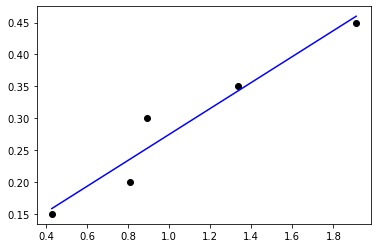

In [24]:
# Mostramos los resultados de forma gráfica, junto con la recta de regresión.
plt.scatter(X[0:1000], Y[0:1000], color = "black")
plt.plot(X[0:1000], Y_pred[0:1000], color = "blue")
plt.show()

# 6.<span style='color:#23CDBD'>|</span>Conclusiones práctica 

·A lo largo de la realización de este proyecto experimental hemos podido observar cómo los valores de g calculados en las distintas repeticiones se han desviado con respecto al valor real de 9,81. Esto se debe al gran cúmulo de errores en cada una de las magnitudes, ya sea por la precisión de los aparatos o por el factor humano. Los distintos redondeos de las cifras significativas nos han hecho perder exactitud.

·La aproximación por mínimos cuadrados, nos ha permitido conocer de manera experimental una pendiente a partir de la cual pudimos expresar g mediante dicha aproximación. Esta discrepancia del valor teórico respecto al experimental nos ha permitido comprender que plantear cualquier problema en física se basa en aproximar mediante un modelo un conjunto de valores que nos permitirán conocer y predecir lo que ocurre en nuestro alrededor.